# GRIP Task #1 : Prediction using Supervised Machine Learning - Linear Regression

## Project by M Premika

### Aim 

To establish a relationship between the variables and formulate a model to predict the percentage of a student based on the number of study hours. 

### Dataset 

The dataset given is the student data which consists of two variables - number of hours spent by the student and the scores. Here, the number of hours spent by the student is the independent variable and the scores is the dependent variable. 

### Methodology

A *Linear Regression* model is used to find a relationship between the number of study hours and the scores of the student.  

To implement regression functions, the library function  *scikit-learn*  is used.

A linear regression model is of the form:

<center><b> y = mx + c </b></center>

where, 
<br> y is the response variable
<br> x is the explanatory variable
<br> m is the slope
<br> c is the intercept

In [1]:
# To import the library packages

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  

In [2]:
# Reading the data from csv file

stud_info = pd.read_csv("studentinfo.csv")

In [3]:
# To print the first 5 elements

stud_info.head(5) 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# To get the summary of the dataset

print(stud_info.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


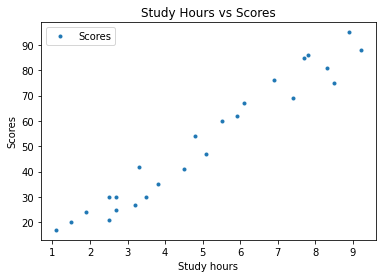

In [5]:
# To visualize the data given

stud_info.plot(x='Hours',y='Scores',style = '.')
plt.title('Study Hours vs Scores')
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.show()

From the graph, we can see that the there is a positive linear relationship between the study hours and scores of the student.

In [6]:
# To import the packages required for developing an algorithm

import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
# To divide the data into attributes and labels

X = stud_info['Hours'].values.reshape(-1,1)
y = stud_info['Scores'].values.reshape(-1,1)

print('Attributes size : ',X.shape)
print('Labels size : ',y.shape)

Attributes size :  (25, 1)
Labels size :  (25, 1)


In [8]:
# To split the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Training attributes size is ', X_train.shape)
print('Testing attributes size is ', X_test.shape)

print('Training labels size is ', y_train.shape)
print('Testing labels size is ', y_test.shape)

Training attributes size is  (20, 1)
Testing attributes size is  (5, 1)
Training labels size is  (20, 1)
Testing labels size is  (5, 1)


In [9]:
# To train the algorithm

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Training complete')

Training complete


In [10]:
# To print the values of the coefficient and intercept

print('Intercept is: ', regressor.intercept_[0])
print('Coefficient is: ', regressor.coef_[0][0]) 

Intercept is:  2.018160041434683
Coefficient is:  9.910656480642237


Therefore, the Intercept (c) value is 2.02 (approx) and the slope (m) is 9.91 (approx)

Thus the regression line equation is 
<center><b> y = 9.91x + 2.02 </b></center>

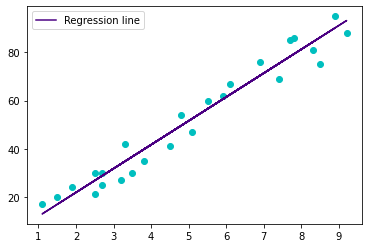

In [82]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X, y, color = 'c')
plt.plot(X, line, color = 'indigo', label='Regression line')
plt.legend()
plt.show()

In [12]:
# To make predictions

y_pred = regressor.predict(X_test)

In [13]:
# To print the train and test scores

print('Train score ', regressor.score(X_train,y_train))
print('Test score ', regressor.score(X_test,y_test))

Train score  0.9515510725211552
Test score  0.9454906892105356


In [14]:
# Model evaluation

print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error :  4.183859899002975
Mean Squared Error :  21.5987693072174
Root Mean Squared Error :  4.6474476121003665


In [15]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


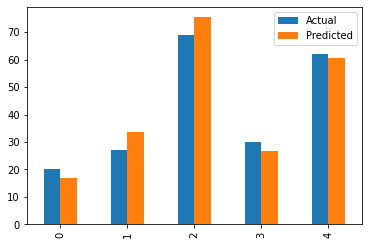

In [16]:
df.plot(kind='bar')
plt.show()

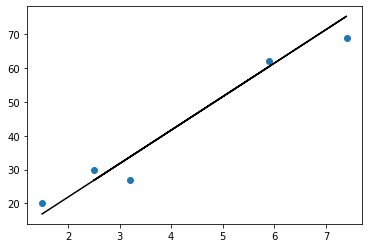

In [17]:
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='black')
plt.show()

In [18]:
#To find the score when the student studies for 9.25 hours per day

hours = [[9.25]]
pred = regressor.predict(hours)
print("No of Hours = ", hours[0][0])
print("Predicted Score = ", pred[0][0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


### Results

From the above model, we can find out that after approximation, 

1. Mean Absolute Error = 4.18
2. Mean Squared Error =  21.60
3. Root Mean Squared Error =  4.65

<b>The R² value is 0.95</b>